In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf


In [23]:
start = '2014-01-01' 
end = '2024-01-01'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [24]:
data.reset_index(inplace = True)

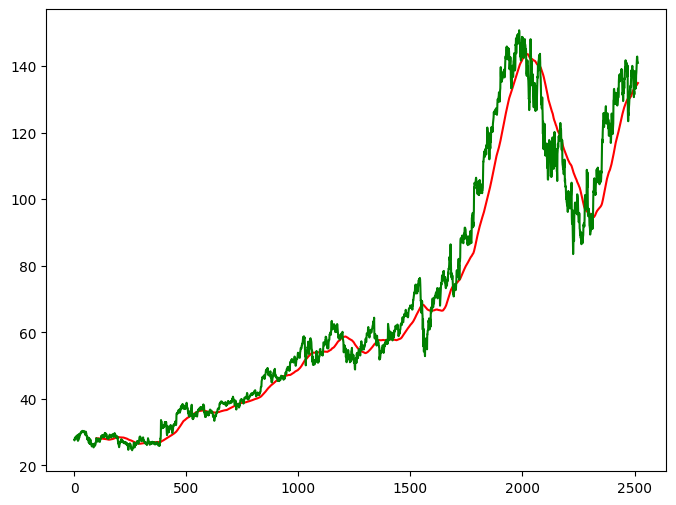

In [25]:
ma_100_days = data.Close.rolling(100).mean()
plt.figure(figsize = (8,6))
plt.plot(ma_100_days,'r')
plt.plot(data.Close, 'g')
plt.show()

In [26]:
data.dropna(inplace = True)

In [27]:
train_split = 0.80
data_train = pd.DataFrame(data.Close[0: int(len(data)*train_split)])
data_test = pd.DataFrame(data.Close[int(len(data) * train_split): len(data)])

In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))

In [29]:
data_train = scaler.fit_transform(data_train)
data_test = scaler.fit_transform(data_test)

In [30]:
x = []
y = []

for i in range(100, data_train.shape[0]):
    x.append(data_train[i-100:i])
    y.append(data_train[i,0])

x = np.array(x)
y = np.array(y)

In [31]:
# from tensorflow.python.keras.layers import Dense, Dropout
from keras.src.layers import LSTM, Dense, Dropout

from keras import Sequential
model = Sequential()

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1))

/Users/aryam/anaconda3/envs/myenv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [32]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [33]:
model.fit(x,y,epochs = 50, batch_size = 32, verbose = 1)

Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 101ms/step - loss: 0.0460
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - loss: 0.0052
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 0.0044
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 98ms/step - loss: 0.0042
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - loss: 0.0035
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - loss: 0.0037
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 0.0042
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 110ms/step - loss: 0.0034
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - loss: 0.0030
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - loss: 0.0034
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - loss: 0.0034
Epoch 12/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - loss: 0.0034
Epoch 13/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 98ms/step - loss: 0.0035
Epoch 14/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - loss: 0.0030
Epoch 15/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - loss: 0.

In [34]:


# Assuming data_train and data_test are already defined
# Get the last 100 rows of data_train
past_100_days = data_train[-100:]

# Convert past_100_days to DataFrame if it's not already
if not isinstance(past_100_days, pd.DataFrame):
    past_100_days = pd.DataFrame(past_100_days)

# Create a copy of data_test and convert it to DataFrame
data_test_copy = pd.DataFrame(data_test)

# Concatenate past_100_days and data_test_copy
data_test= pd.concat([past_100_days, data_test_copy], ignore_index=True)




In [35]:
data_test.shape

(604, 1)

In [36]:
x = []
y = []

for i in range(100, data_test.shape[0]):
    x.append(data_test.iloc[i-100:i].values)
    y.append(data_test.iloc[i,0])

x = np.array(x)
y = np.array(y)

In [37]:
y_predict = model.predict(x)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


In [38]:
1/scaler.scale_

array([64.54650116])

In [39]:
y_predict = y_predict * (1/scaler.scale_)
y = y * (1/scaler.scale_)

In [40]:
y

array([63.01450348, 62.51250458, 61.18950653, 61.58449554, 60.92650604,
       54.16350555, 54.06099701, 53.51450348, 55.08400726, 56.52750397,
       58.15799713, 55.64099884, 56.29650116, 52.80049896, 52.16199493,
       50.01650238, 46.60199738, 46.88199615, 43.24549866, 45.75000763,
       45.63100433, 49.79950714, 52.20850372, 54.3884964 , 64.54650116,
       59.16049957, 59.52600861, 55.44800568, 55.72299957, 57.96300507,
       55.11249542, 50.64000702, 51.81000519, 52.93550873, 53.99750519,
       48.81850433, 46.97750092, 45.91249847, 44.09500122, 49.18349457,
       51.02950287, 51.40100861, 50.6780014 , 51.2614975 , 50.81800079,
       48.63199615, 42.97450256, 43.78850555, 50.37599945, 49.19200897,
       46.98549652, 43.25099945, 46.17050934, 50.20050812, 51.11049652,
       53.31150055, 52.9885025 , 56.78749847, 55.0134964 , 57.8219986 ,
       58.03150177, 58.45999908, 59.76000214, 59.15450287, 56.15950775,
       57.20999908, 60.15250397, 57.57300568, 53.68599701, 52.97

<function matplotlib.pyplot.show(close=None, block=None)>

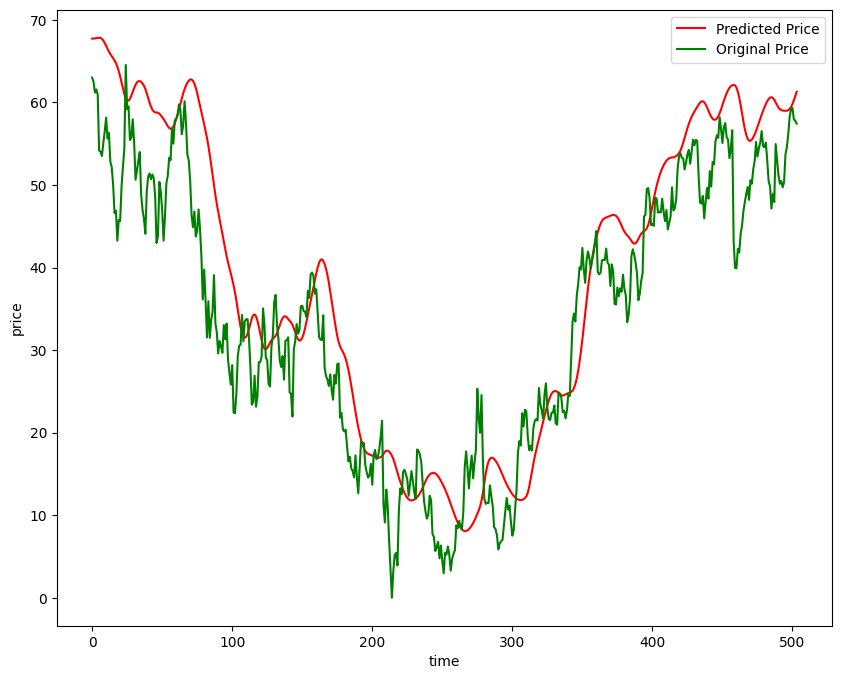

In [41]:
plt.figure(figsize = (10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.show

In [42]:
model.save('Stock Predictions Model.keras')